In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
tracks=pd.read_csv("Formula1-DatasetFull/raw_data/races.csv")
qual=pd.read_csv("Formula1-DatasetFull/raw_data/qualifying.csv")
teams=pd.read_csv("Formula1-DatasetFull/raw_data/constructors.csv")

In [73]:
merge1=qual.merge(tracks[["raceId","year","name"]],left_on="raceId",right_on="raceId")

In [74]:
merge2=merge1.merge(teams[["name","constructorId"]],left_on="constructorId",right_on="constructorId")

In [75]:
merge2=merge2.rename(columns={"name_x":"Race name","name_y":"team_name"})

In [76]:
merge2=merge2[["team_name","Race name","q1","year"]]

In [77]:
good_years=merge2[merge2["year"].isin([2021,2022])]

In [78]:
good_years.loc[good_years["Race name"]=="São Paulo Grand Prix","Race name"]="Brazilian Grand Prix"

In [79]:
numtimes=sum(good_years["Race name"].value_counts()==40)
index=(good_years["Race name"].value_counts().index[:16])
good_years_filtered=good_years[good_years["Race name"].isin(index)]

In [80]:
missing_data=good_years_filtered[good_years_filtered['q1'].str.contains(r'\\N')]["Race name"].values

In [81]:
final_data=good_years_filtered[~good_years_filtered["Race name"].isin(missing_data)]

In [82]:
final_data["min:sec"]=final_data["q1"].str.split(".").str[0]

/var/folders/5y/l2g9hszs42v81fsm6b_z9d2h0000gn/T/ipykernel_65873/3844006348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["min:sec"]=final_data["q1"].str.split(".").str[0]


In [83]:
temp=final_data["min:sec"]
final_data["seconds"]=pd.to_numeric(temp.str[0])*60+pd.to_numeric(temp.str[2:])

/var/folders/5y/l2g9hszs42v81fsm6b_z9d2h0000gn/T/ipykernel_65873/3275925861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["seconds"]=pd.to_numeric(temp.str[0])*60+pd.to_numeric(temp.str[2:])


A dataset that included the year, the team, the driver, the lap time.



In [84]:
def function(team):
    mean_old=team[team["year"]==2021]["seconds"].mean()
    mean_new=team[team["year"]==2022]["seconds"].mean()
    return mean_new-mean_old

In [85]:
grouped_data=final_data.groupby(["team_name"]).apply(function).reset_index().rename(columns={0:"Time_diff_seconds"}).sort_values(by="Time_diff_seconds")

In [88]:
grouped_data

,team_name,Time_diff_seconds
5,Haas F1 Team,0.454545
4,Ferrari,1.045455
0,Alfa Romeo,1.090909
8,Red Bull,1.181818
2,Alpine F1 Team,1.454545
3,Aston Martin,1.545455
1,AlphaTauri,1.727273
7,Mercedes,1.772727
6,McLaren,1.909091
9,Williams,1.909091


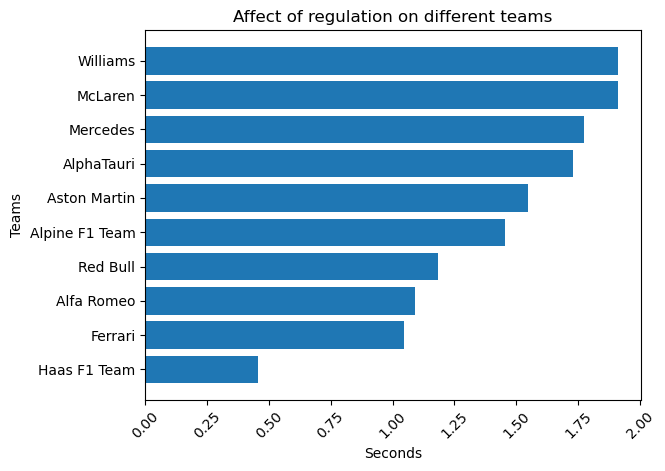

In [87]:

# Assuming group_times is your DataFrame with 'team_name' and 'seconds' columns
plt.barh(grouped_data["team_name"], grouped_data["Time_diff_seconds"])

plt.ylabel('Teams')
plt.xlabel('Seconds')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.title("Affect of regulation on different teams")

plt.show()